## Investigate High Paying Skills

**Topics Covered** 

*This exercise goes over:*


1)Plotting

2)Customization

## Question

In our project we want to analyze salary data. Here's what we'll be focusing on:

Visualize for highest paying skills

Visualize for highest demanded skills


In [1]:
#loading the Data
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) #to convert str to list

c:\Users\sande\anaconda3\envs\my_learnings\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#only get Data analyst jobs in US

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Droping NaN values from the 'salary_year_avg' column for accurate visualization

df_DA_US = df_DA_US.dropna(subset= 'salary_year_avg')

df_DA_US


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


In [3]:
#so the we want the top skills which pay the highest and other thing we want top skills which are in demeand. (ie demand means frequently pop up in job postings)
#top paying skills means they might not appear in huge number but they yeilds the higher pays. 

#one thing I understood that I will be needing two columns first is job_skills to get the skills and the second one is salary average to get the pay.
#okay then what? The job skills is in list we need it in each skill in its individual row. SO, we will explode that coloumn.

#then we will use group by We will be grouping the skills and for the aggregation we will use salary year avg. we will run to agg method count and median
#median will get the salary of all the grouped skills and count will  skills counts for that pay. so we can get highest skills count.

#SO we will use group by for it. we will group job_skills columns and for aggregation we will use the salary year avg. for the aggrefation we will
#be runnig two count to get the  skills counts and median to get the salaries. then we will assign that groupby to TWO new DATAFRAME one will
#skills that pays the top(ie most), and the another one will be the count of the higest skills count.

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group =df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_Da_top_pay = df_DA_US_group.sort_values(by= 'median', ascending=False).head(10) #for highest pay we will sort values by median
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by= 'median', ascending=False) #for the highest skills 
#we will first sort the values by count to get the highest count then again we will sort it by median so we will have counts and high salaries 

df_DA_skills


,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


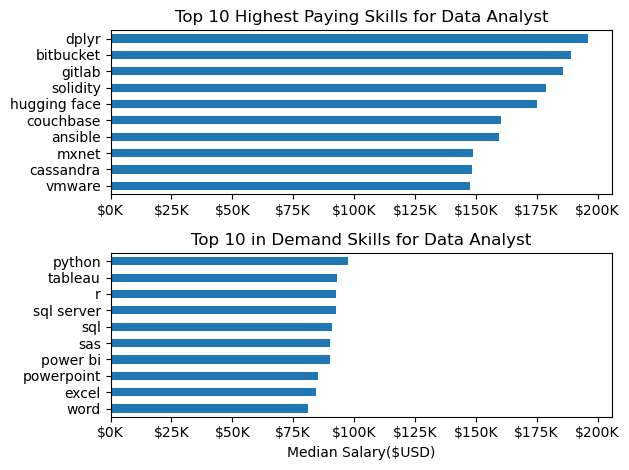

In [4]:
fig ,ax = plt.subplots(2,1)

#df_Da_top_pay.plot(kind='barh', y= 'median', ax= ax[0], legend=False)

#ax[0].invert_yaxis()  #this is to get the highest value at top. bccause python will  start plotting  the highest value from bottom.

#you can also do this to invert axis.
df_Da_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False) #you directly called the last valve by in [] bt : : -1 which means the last value
ax[0].set_title('Top 10 Highest Paying Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))




df_DA_skills.plot(kind='barh', y= 'median', ax= ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim()) #we want both the axis to be equal. so we used for the bottom one .set_xlim method and inside it
                                    #we call ax[0] which is first plot and used .get_xlim() to get the x axis lim from it and apply to ax[1]plot.

ax[1].set_title('Top 10 in Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlabel('Median Salary($USD)')

plt.tight_layout()

